In [1]:
from pyfile import eval, eq
from discopy.quantum.zx import Spider, Id
from spiders import W_old, W, Z, Swap, H, CZ, FSwap, X, ZBox

import numpy as np
pi = np.pi

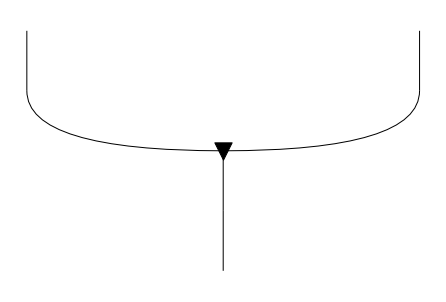

In [2]:
W_old(2, False).draw()

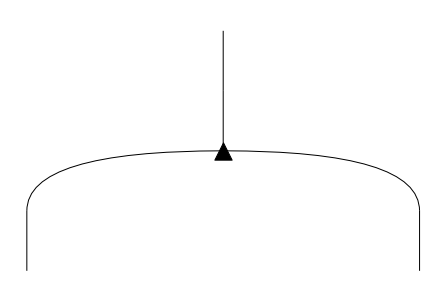

(2, 1)

In [3]:
cw = W_old(2, False)
w = cw.dagger()
w.draw()
len(cw.dom), len(cw.cod)

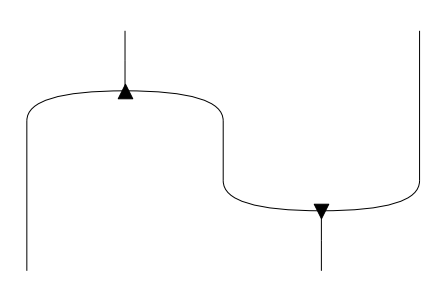

array([[1., 0., 0., 0.],
       [0., 1., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [4]:
z = w @ Id(1) >> Id(1) @ cw
z.draw()
eval(z).astype(float)

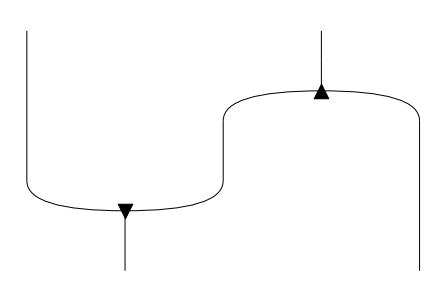

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 1., 0.],
       [0., 0., 0., 1.]])

In [5]:
zz = Id(1) @ w >> cw @ Id(1)
zz.draw()
eval(zz).astype(float)

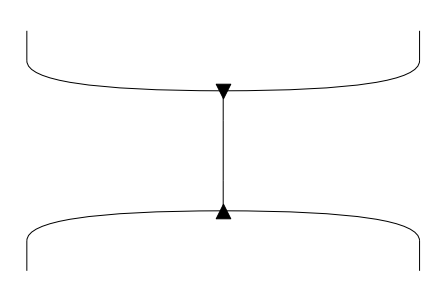

array([[1., 0., 0., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 0., 0., 0.]])

In [6]:
z2 = cw >> w
z2.draw()
eval(z2).astype(float)

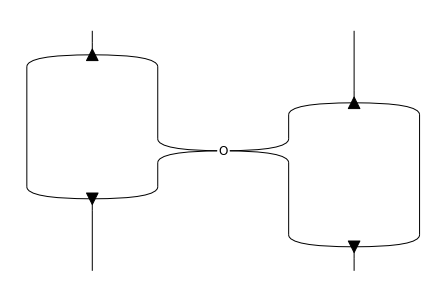

<ipython-input-7-eecfced79642>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  eval(z22).astype(float)


array([[0.70711, 0.     , 0.     , 0.     ],
       [0.     , 0.70711, 0.70711, 0.     ],
       [0.     , 0.70711, 0.70711, 0.     ],
       [0.     , 0.     , 0.     , 0.     ]])

In [7]:
z22 = w @ w >> Id(1) @ FSwap @ Id(1) >> cw @ cw
z22.draw()
eval(z22).astype(float)

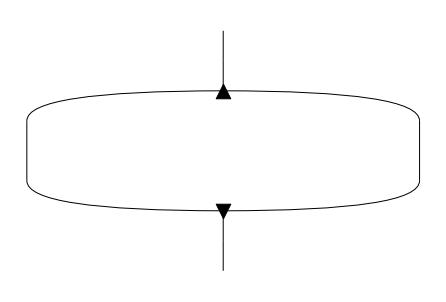

array([[1., 0.],
       [0., 2.]])

In [8]:
d = W_old() >> W_old().dagger()
d.draw()
eval(d)

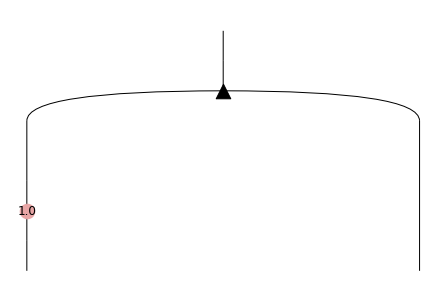

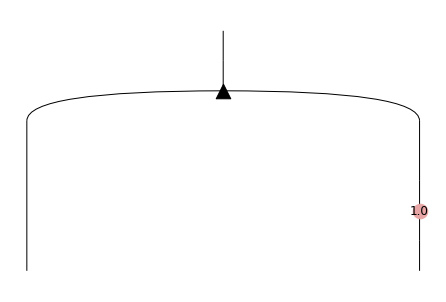

(array([[0.+0.j, 1.+0.j],
        [0.+0.j, 0.+0.j],
        [1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j]]),
 array([[0.+0.j, 1.+0.j],
        [1.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j]]),
 array([[0.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j],
        [0.+0.j, 1.+0.j],
        [1.+0.j, 0.+0.j]]),
 array([[0.+0.j, 0.+0.j],
        [1.+0.j, 0.+0.j],
        [1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j]]))

In [9]:
a = W() >> X(1, 1, 1) @ Id(1)
b = W() >> Id(1) @ X(1, 1, 1)
c = W() >> X(1, 1, 1) @ X(1, 1, 1)
d = X(1, 1, 1) >> W() >> X(1, 1, 1) @ X(1, 1, 1)
a.draw(), b.draw()
eval(a), eval(b), eval(c), eval(d)

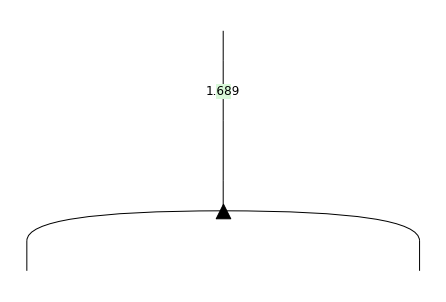

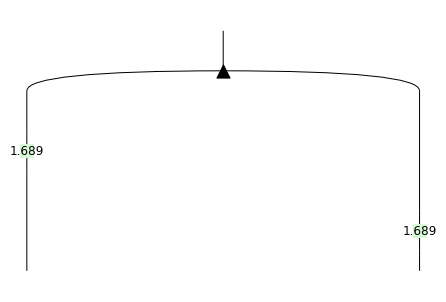

(None, None)

In [11]:
for _ in range(10):
    x = round(np.random.rand() * 2, 3)

    a = ZBox(1, 1, x) >> W()
    b = W() >> ZBox(1, 1, x) @ ZBox(1, 1, x)
    assert eq(a, b)
a.draw(), b.draw()

In [12]:
eval(Z(1, 1, pi))

array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]])

In [13]:
x = 2
a = ZBox(1, 1, x) >> W()
b = W() >> ZBox(1, 1, x) @ ZBox(1, 1, x)
eval(a), eval(b)

(array([[1.+0.j, 0.+0.j],
        [0.+0.j, 2.+0.j],
        [0.+0.j, 2.+0.j],
        [0.+0.j, 0.+0.j]]),
 array([[1.+0.j, 0.+0.j],
        [0.+0.j, 2.+0.j],
        [0.+0.j, 2.+0.j],
        [0.+0.j, 0.+0.j]]))

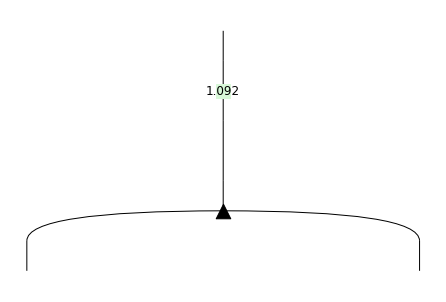

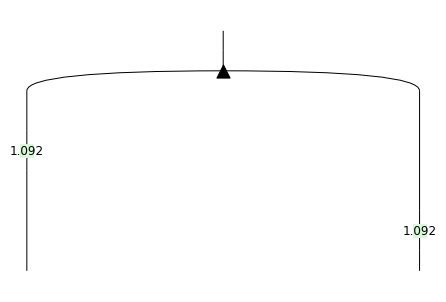

(None, None)

In [14]:
for _ in range(10):
    x = round(np.random.rand() * 2, 3)

    a = ZBox(1, 1, x) >> W_old()
    b = W_old() >> ZBox(1, 1, x) @ ZBox(1, 1, x)
    assert eq(a, b)
a.draw(), b.draw()

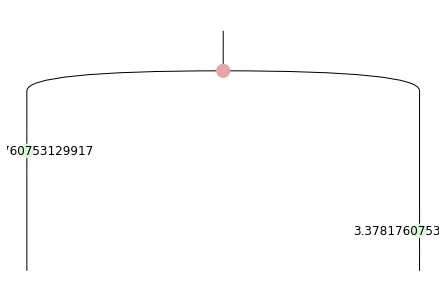

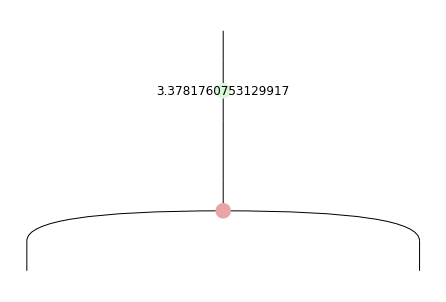

(array([[ 1.     +0.j     ,  0.     +0.j     ],
        [ 0.     +0.j     , -0.97214-0.23438j],
        [ 0.     +0.j     , -0.97214-0.23438j],
        [ 0.89013+0.45571j,  0.     +0.j     ]]),
 array([[ 1.     +0.j     ,  0.     +0.j     ],
        [ 0.     +0.j     , -0.97214-0.23438j],
        [ 0.     +0.j     , -0.97214-0.23438j],
        [ 1.     +0.j     ,  0.     +0.j     ]]))

In [21]:
for _ in range(10):
    x = np.random.rand() * 2 * pi

    a = X(1, 2) >> Z(1, 1, x) @ Z(1, 1, x)
    b = Z(1, 1, x) >> X(1,2)
    #assert eq(a, b)
a.draw(), b.draw()
eval(a), eval(b)

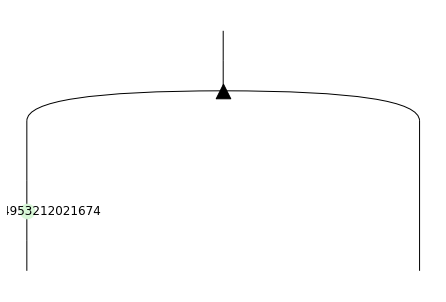

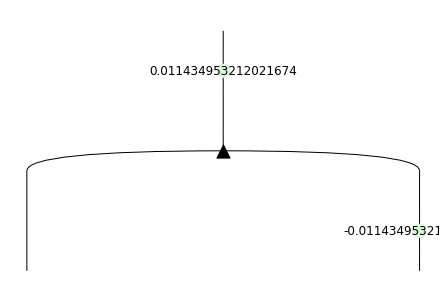

(None, None)

In [22]:
for _ in range(10):
    x = np.random.rand() * 2 * pi

    a = W() >> Z(1, 1, x) @ Id(1)
    b = Z(1, 1, x) >> W() >> Id(1) @ Z(1, 1, -x)
    assert eq(a, b)
a.draw(), b.draw()

In [23]:
eval(H >> W() )

array([[ 0.70711,  0.70711],
       [ 0.70711, -0.70711],
       [ 0.70711, -0.70711],
       [ 0.     ,  0.     ]])

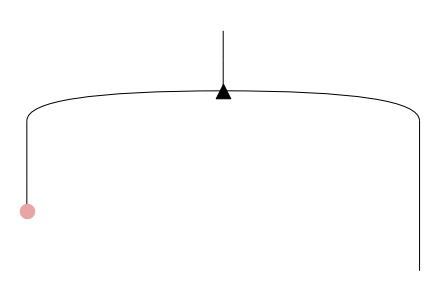

[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


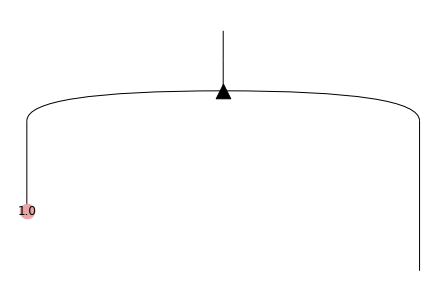

[[0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j]]


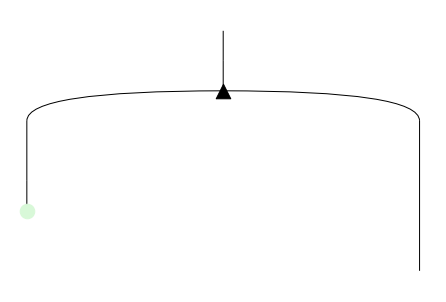

[[1.+0.j 1.+0.j]
 [0.+0.j 1.+0.j]]


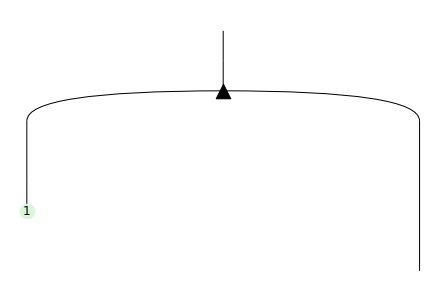

[[1.    +0.j      0.5403+0.84147j]
 [0.    +0.j      1.    +0.j     ]]


In [24]:
for base in [X, Z]:
    for phase in [0, 1]:
        d = W() >> base(1, 0, phase) @ Id(1)
        d.draw()
        print(eval(d))